In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation and Cleaning

Here we load the data and clean it.

In [2]:
#ensure excel file is in the folder with jupyter notebook

path = r'C:\Users\iiscw\Documents\DataScience\Flight_ticket.xlsx'
data = pd.read_excel(path)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.shape

(10683, 11)

In [5]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.isna()  #or data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


this gives us the whole dataframe marking the null values. hard to read therefore we use the sum method to make it easy for us to makse sense of this

In [9]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data.dropna(inplace = True)

In [12]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EXPLORATORY DATA ANALYSIS AND ENGINEERING

1. Duration
2. Departure and Arrival Time
3. Data of Journey
4. Total Stops
5. Additional Info
6. Airline
7. Source and Destination
8. Route

DURATION

In [13]:
def convert_duration(duration):
    if len(duration.split())==2:
        hours = int(duration.split()[0][:-1])   
        #hours = int(duration.split('h')[0])
        minutes = int(duration.split()[1][:-1])
        #minutes = int(duration.split('h ')[1].split('m')[0])
        return hours*60 + minutes
    else:
        return int(duration[:-1])*60
   #elif 'h' in duration:
        #return int(duration.split('h')[0]*60
    # elif 'm' in duration:
        #return int(duration.split('m')[0])
    #else:
     #   return 0  # Handle invalid input

In [14]:
# to make the changes permanent in the dataframe
data['Duration'] = data['Duration'].apply(convert_duration)

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [16]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.dtypes

C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\3322212648.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\3322212648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])


Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Dep_Time_in_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_in_minutes'] = data['Dep_Time'].dt.minute
data['Arrival_Time_in_hours'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_in_minutes'] = data['Arrival_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-04-11 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-11 05:50:00,2024-04-11 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-11 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-04-11 18:05:00,2024-04-11 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-04-11 16:50:00,2024-04-11 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [18]:
data.drop(['Dep_Time','Arrival_Time'],axis = 1, inplace = True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


DATE OF JOURNEY

In [19]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data.head()

C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\1331629537.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [20]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

In [21]:
data['day'] = data['Date_of_Journey'].dt.day
data['month'] = data['Date_of_Journey'].dt.month

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [23]:
data.drop('Date_of_Journey', axis = 1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [24]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [25]:
data['Total_Stops'] = data['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
})

In [26]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


ADDITIONAL INFO

In [27]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [28]:
data.drop('Additional_Info', axis = 1, inplace = True)

In [29]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [30]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

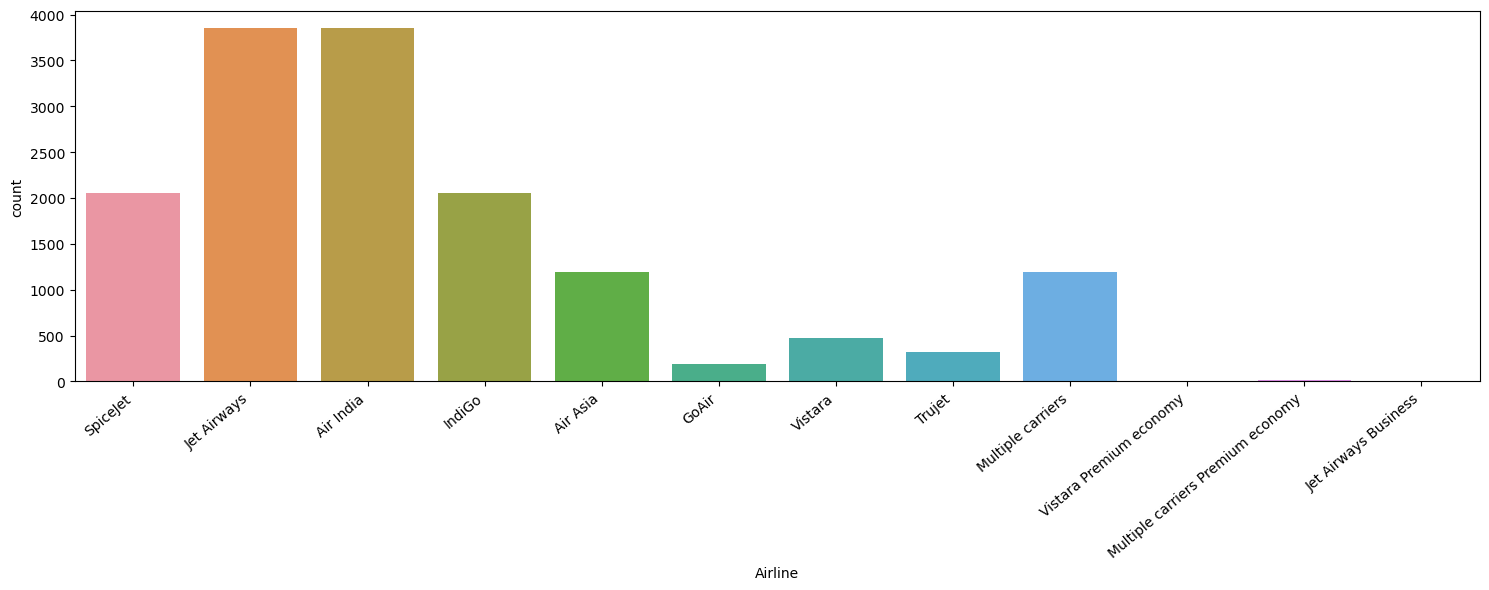

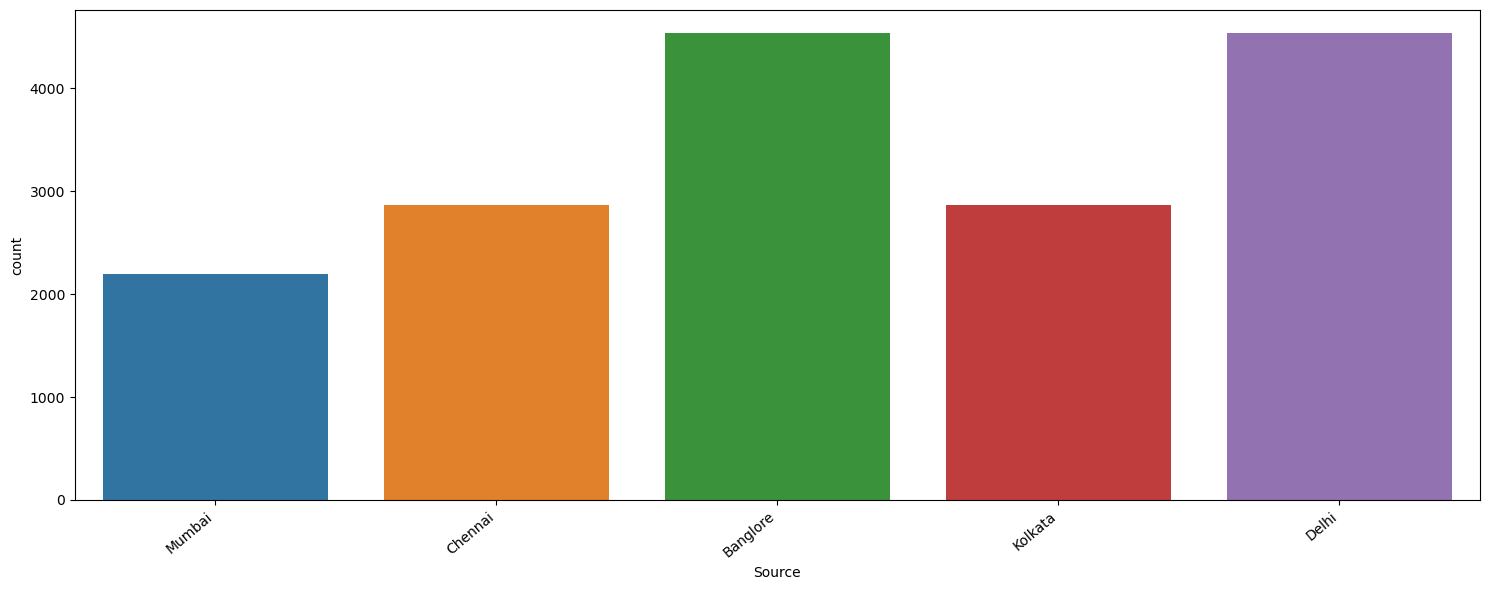

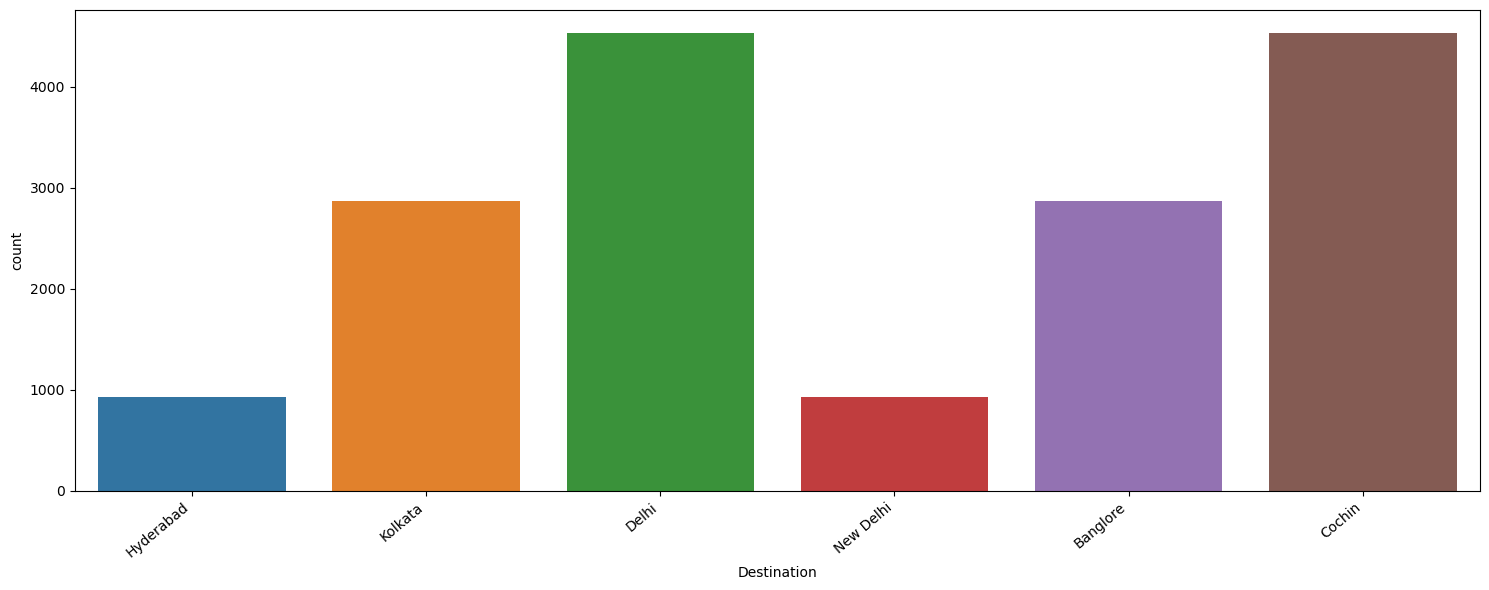

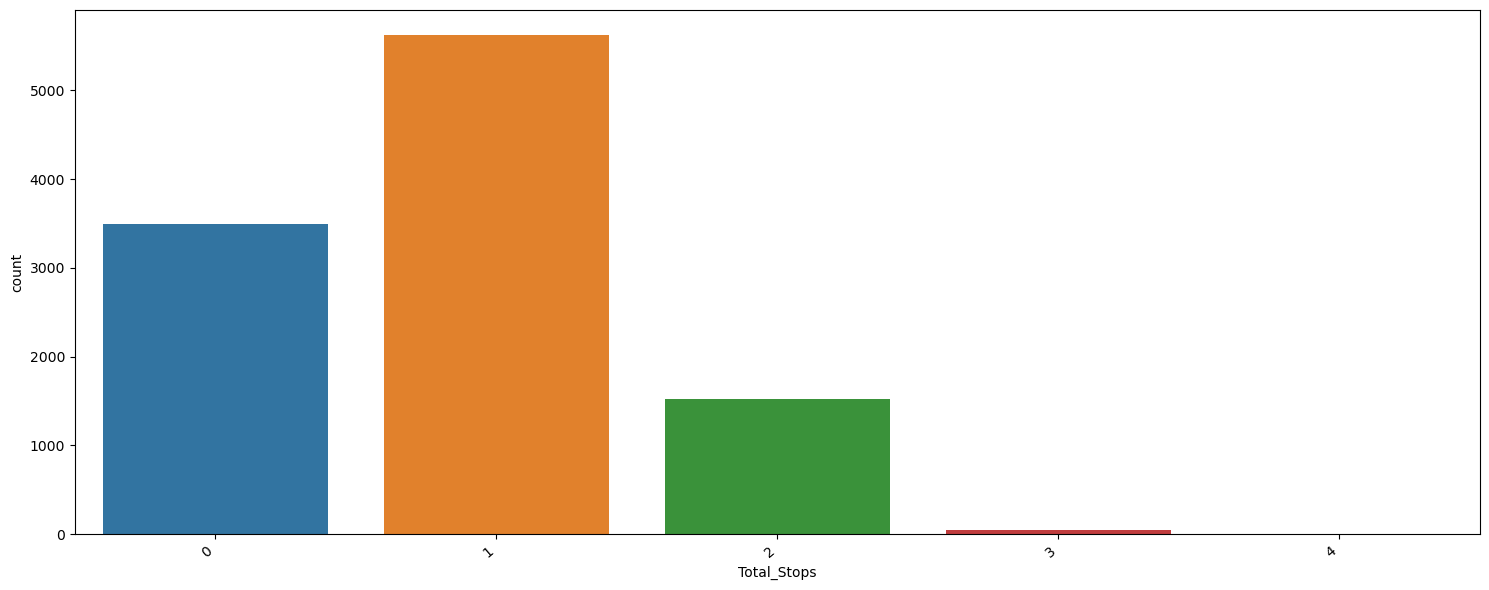

In [31]:
for i in ['Airline', 'Source', 'Destination','Total_Stops']:
    plt.figure(figsize=(15,6))
    sns.countplot(data = data, x = i)
    ax = sns.countplot(x = i,data = data.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

DATA VISUALIZATION - AIRLINE _ Barplot

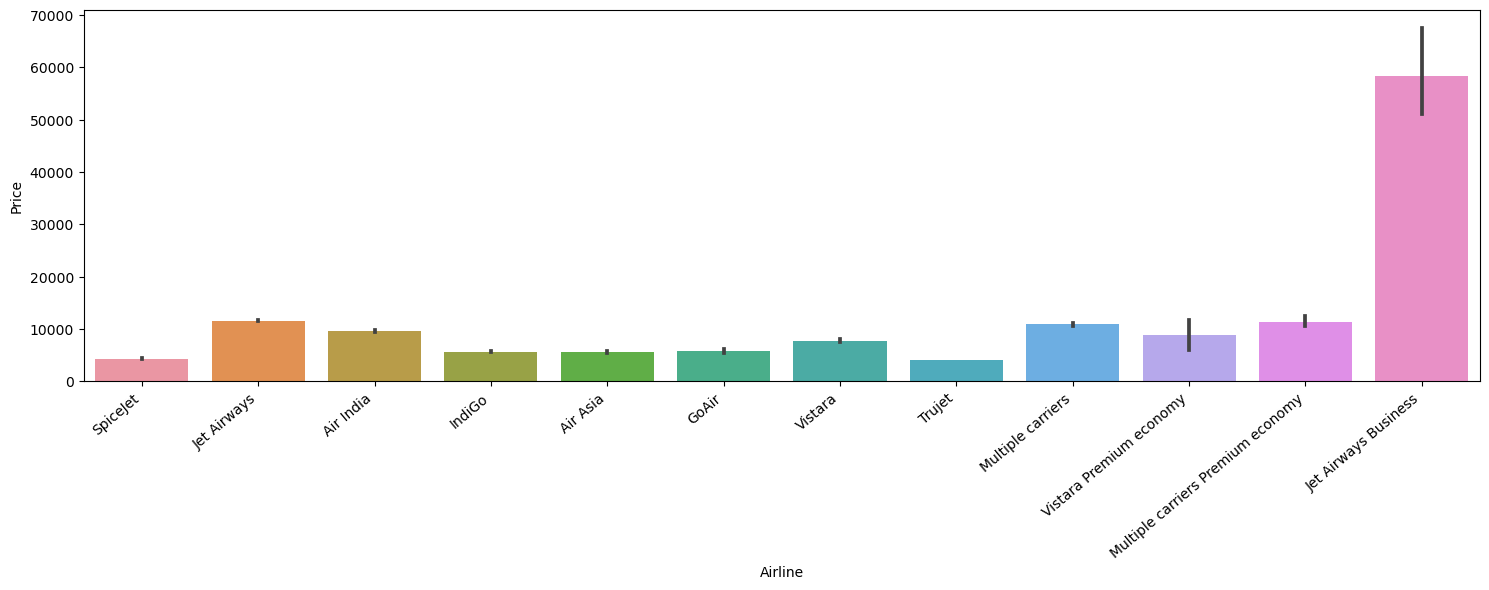

In [32]:
plt.figure(figsize =(15,6))
ax = sns.barplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

AIRLINE DATA VISUALIZATION - BOXPLOT USING SEABORN

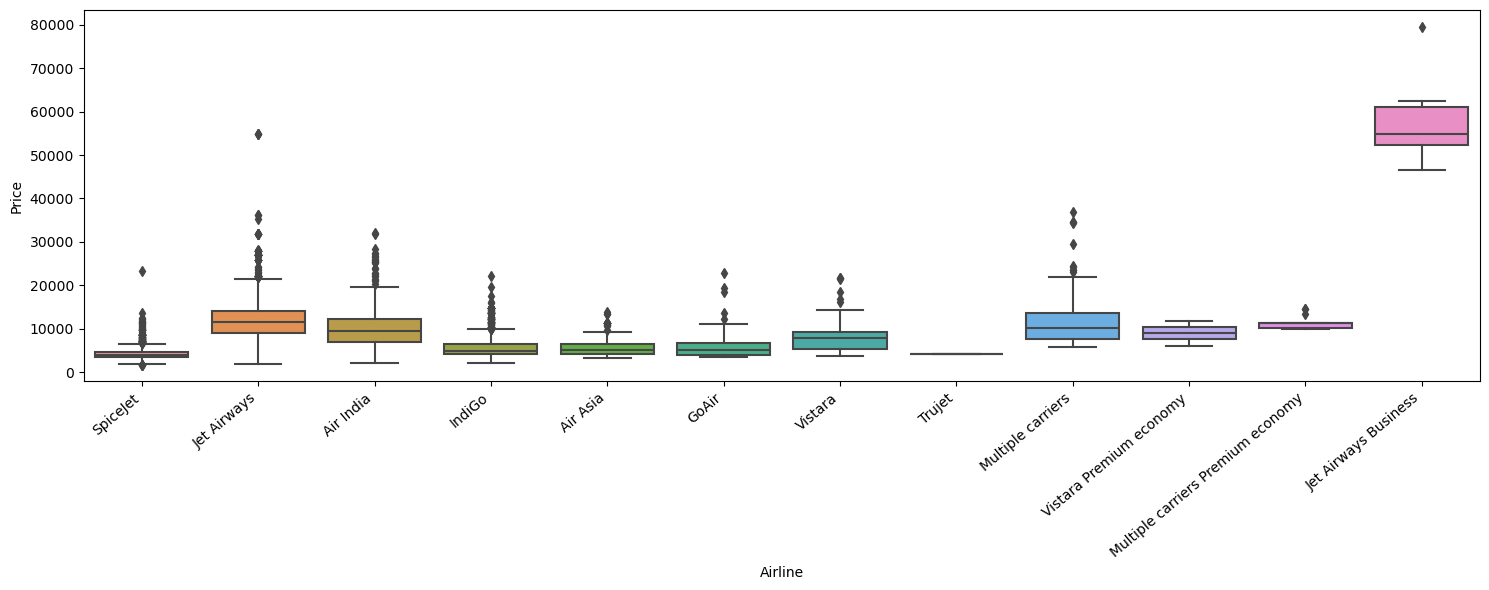

In [33]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha ='right')
plt.tight_layout()
plt.show()

In [34]:
data.groupby('Airline').describe()['Price'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


ENCODING AIRLINE NAMES TO DUMMY INTEGERS

In [35]:
Airline = pd.get_dummies(data['Airline'],drop_first = True, dtype = int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [36]:
Airline.dtypes

Air India                            int32
GoAir                                int32
IndiGo                               int32
Jet Airways                          int32
Jet Airways Business                 int32
Multiple carriers                    int32
Multiple carriers Premium economy    int32
SpiceJet                             int32
Trujet                               int32
Vistara                              int32
Vistara Premium economy              int32
dtype: object

In [37]:
data = pd.concat([data,Airline], axis =1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [38]:
data.drop('Airline' , axis = 1, inplace = True)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


SOURCE AND DESTINATION

In [39]:
#LIST TO STORE SOURCE AND DESITINATION
list1 = ['Source', 'Destination']
for i in list1:
    print(data[[i]].value_counts(), '\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [40]:
data = pd.get_dummies(data=data, columns=list1, drop_first = True, dtype=int)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,0,0,0,0,0,1


ROUTE DATA ENGINEERING

In [41]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [42]:
data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [43]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [44]:
route['Route_1'] = route['Route'].str.split('→').str[0]
route['Route_2'] = route['Route'].str.split('→').str[1]
route['Route_3'] = route['Route'].str.split('→').str[2]
route['Route_4'] = route['Route'].str.split('→').str[3]
route['Route_5'] = route['Route'].str.split('→').str[4]
route.head()

C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\962169124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1'] = route['Route'].str.split('→').str[0]
C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\962169124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2'] = route['Route'].str.split('→').str[1]
C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\962169124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [45]:
route.fillna('None', inplace =True)
route.head()

C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\1162347552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace =True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in range(1,6):
    col = 'Route_' + str(i)
    route[col] = le.fit_transform(route[col])

route.head()

C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\3295684944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\3295684944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\3295684944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [47]:
route.drop('Route', axis = 1, inplace = True)
route.head()

C:\Users\iiscw\AppData\Local\Temp\ipykernel_23844\2499507917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route', axis = 1, inplace = True)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [48]:
data = pd.concat([data,route], axis = 1)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,1,0,34,8,13,5


In [49]:
data.drop('Route', axis = 1, inplace = True)
data.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,1,5,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,9,6,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,12,5,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,1,3,0,...,0,0,0,0,1,0,34,8,13,5


BUILDING MACHINE LEARNING MODEL


In [50]:
# Pop the desired column and reinsert it at the end
column = data.pop('Price')
data['Price'] = column

# Check the structure and contents of your DataFrame after moving column_2
print("\nAfter moving Price:")
data.head()




After moving Price:


,Duration,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,day,month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,1,5,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,9,6,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,12,5,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,1,3,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [51]:
#check indexes of dataframe
data.columns

Index(['Duration', 'Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes',
       'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'day', 'month',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Price'],
      dtype='object')

In [52]:
#checking the indexes of the columns
column_indexes = list(range(len(data.columns)))
print(column_indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


IMPORTING STANDARD SCALAR FROM SCIKIT LEARNING TO NORMALISE DATA

In [53]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data = scalar.fit_transform(data)
data[0]

array([-0.93160111, -1.22066609,  1.65415376, -0.2349499 , -1.80043628,
       -0.8900139 ,  1.23728754, -1.46740227, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

## SPLITTING THE DATASET INTO A TRAINING AND TESTING DATASET:

In [54]:
from sklearn.model_selection import train_test_split as tts

x = data[:, :-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.1, random_state = 69)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


## LINEAR REGRESSION

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred)**0.5)
    print(f'R_squared value:' , r2_score(y_true,y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100*np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [57]:
y_pred = model.predict(x_test)

metrics(y_test,y_pred)
print('\n','accuracy:')
accuracy(y_test, y_pred)

RMSE: 0.5321162379189209
R_squared value: 0.6513979045879807

 accuracy:


72.53575756332371

## RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 500, min_samples_split = 3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

PREDICTING USING RANDOM FOREST:- 

In [59]:
pred_rf = model_random_forest.predict(x_test)

CHECKING THE METRICS:-

In [60]:
metrics(y_test, pred_rf)
print('\n','accuracy:')
accuracy(y_test, pred_rf)

RMSE: 0.37341165992517295
R_squared value: 0.8283306672655625

 accuracy:


98.19990619015914